In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: column in ['R3', 'R7', 'R3_raw', 'R5_raw', 'R6_raw', 'R7_raw', 'Class'])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    if i == 3:
        y_pred_3 = y_pred

    print(f"Accuracy KNN (K={i}): ", accuracy_score(y_test, y_pred))

Accuracy KNN (K=2):  0.9513925519569575
Accuracy KNN (K=3):  0.9589091676337166
Accuracy KNN (K=4):  0.9529222491824032
Accuracy KNN (K=5):  0.9534497309842811
Accuracy KNN (K=6):  0.9500210992720751
Accuracy KNN (K=7):  0.9497309842810423
Accuracy KNN (K=8):  0.946144108028273
Accuracy KNN (K=9):  0.946144108028273
Accuracy KNN (K=10):  0.94442979217217
Accuracy KNN (K=11):  0.9429792172170061
Accuracy KNN (K=12):  0.9410011604599642
Accuracy KNN (K=13):  0.9400253191264901
Accuracy KNN (K=14):  0.9384164996307628


In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

  background       0.99      0.99      0.99     10312
      banana       0.95      0.93      0.94     11641
        wine       0.95      0.96      0.95     15963

    accuracy                           0.96     37916
   macro avg       0.96      0.96      0.96     37916
weighted avg       0.96      0.96      0.96     37916



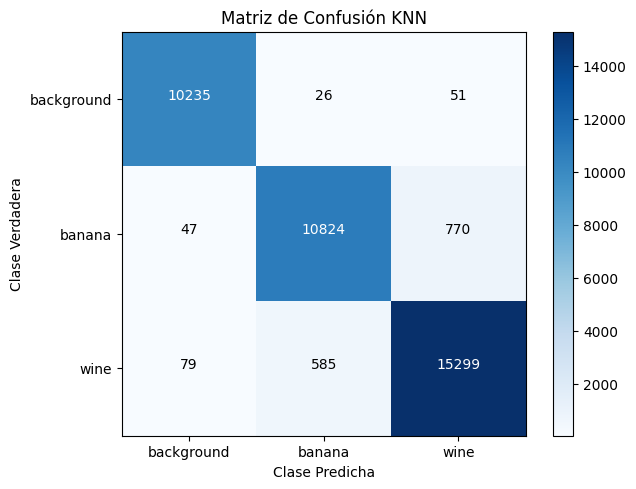

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de confusión
cnf_matrix = confusion_matrix(y_pred=y_pred_3, y_true=y_test)


# Visualizar la matriz de confusión
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión KNN')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_pred_3))
for i in range(3):
    for j in range(3):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > cnf_matrix.max() / 2. else "black")
plt.tight_layout()
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.show()
